---

# CSCI 3202, Fall 2023
# Mancala Project

### Name: Gabe Wallon

<br> 

## Board and rules
**(there are a few modifications from the original game)**

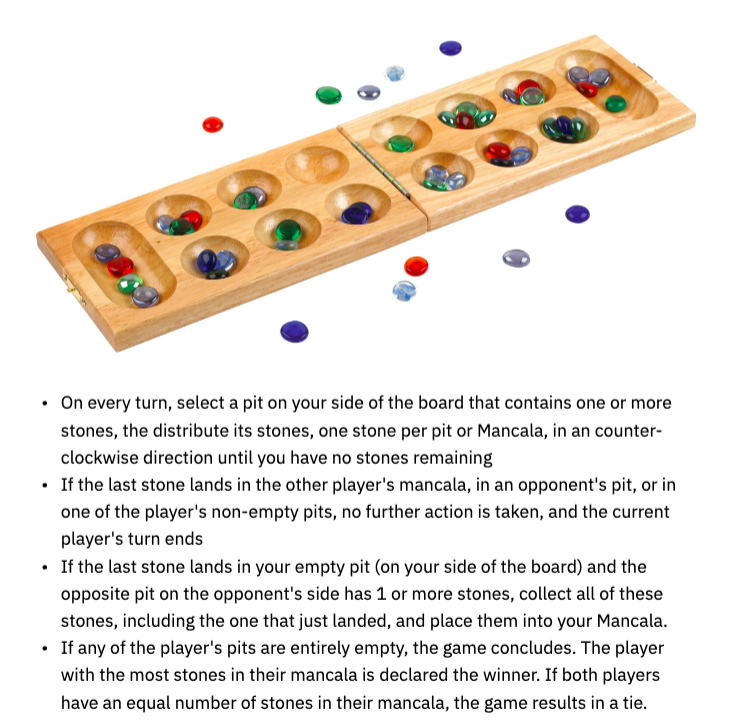

### State Class

In [1]:
import random

In [2]:
class State:
    def __init__(self, pits_per_player=6, stones_per_pit=4, to_move=1):
        self.to_move = to_move  #if an odd integer, P1's turn, otherwise, P2's turn
        self.pits_per_player = pits_per_player
        self.board = [stones_per_pit] * ((pits_per_player+1) * 2)  
        self.p1_pits_index = [0, self.pits_per_player-1]
        self.p1_mancala_index = self.pits_per_player
        self.p2_pits_index = [self.pits_per_player+1, len(self.board)-1-1]
        self.p2_mancala_index = len(self.board)-1
        # Zeroing the Mancala for both players
        self.board[self.p1_mancala_index] = 0
        self.board[self.p2_mancala_index] = 0
        
    def display_board(self):
        """
        Displays the board in a user-friendly format
        """
        player_1_pits = self.board[self.p1_pits_index[0]: self.p1_pits_index[1]+1]
        player_1_mancala = self.board[self.p1_mancala_index]
        player_2_pits = self.board[self.p2_pits_index[0]: self.p2_pits_index[1]+1]
        player_2_mancala = self.board[self.p2_mancala_index]

        print('P1               P2')
        print('     ____{}____     '.format(player_2_mancala))
        for i in range(self.pits_per_player):
            if i == self.pits_per_player - 1:
                print('{} -> |_{}_|_{}_| <- {}'.format(i+1, player_1_pits[i], 
                        player_2_pits[-(i+1)], self.pits_per_player - i))
            else:    
                print('{} -> | {} | {} | <- {}'.format(i+1, player_1_pits[i], 
                        player_2_pits[-(i+1)], self.pits_per_player - i))
            
        print('         {}         '.format(player_1_mancala))
        turn = 'P1' if self.to_move%2==1 else 'P2'
        print('Turn: ' + turn)


### Game Class

In [3]:
import copy

In [4]:
# class Game:
#     """A game is similar to a problem, but it has a terminal test instead of 
#     a goal test, and a utility for each terminal state. To create a game, 
#     subclass this class and implement `actions`, `result`, `is_terminal`, 
#     and `utility`. You will also need to set the .initial attribute to the 
#     initial state; this can be done in the constructor."""
class Mancala_Game:
    def __init__(self, pits_per_player=6, stones_per_pit=4):
        """
        The constructor for the Mancala class defines several instance variables:

        pits_per_player: This variable stores the number of pits each player has.
        stones_per_pit: It represents the number of stones each pit contains at the start of any game.
        board: This data structure is responsible for managing the Mancala board.
        current_player: This variable takes the value 1 or 2, as it's a two-player game, indicating which player's turn it is.
        moves: This is a list used to store the moves made by each player. It's structured in the format (current_player, chosen_pit).
        p1_pits_index: A list containing two elements representing the start and end indices of player 1's pits in the board data structure.
        p2_pits_index: Similar to p1_pits_index, it contains the start and end indices for player 2's pits on the board.
        p1_mancala_index and p2_mancala_index: These variables hold the indices of the Mancala pits on the board for players 1 and 2, respectively.
        """
        self.pits_per_player = pits_per_player
        self.board = [stones_per_pit] * ((pits_per_player+1) * 2)  # Initialize each pit with stones_per_pit number of stones 
        self.current_player = 1
        self.players = 2
        self.moves = []
        self.p1_pits_index = [0, self.pits_per_player-1]
        self.p1_mancala_index = self.pits_per_player
        self.p2_pits_index = [self.pits_per_player+1, len(self.board)-1-1]
        self.p2_mancala_index = len(self.board)-1
        # Zeroing the Mancala for both players
        self.board[self.p1_mancala_index] = 0
        self.board[self.p2_mancala_index] = 0
        
        self.initial = State(pits_per_player, stones_per_pit, self.current_player)
    
    
    def actions(self, state):
        """Returns a list of the valid moves for the current player. """
        
        # the possible action that can be taken depends on the current player
        board = state.board
        to_move = 0
        if state.to_move%2==1:
            to_move = 'P1'
        else:
            to_move = 'P2'
        
        if to_move == 'P1':
            p1_inds = [i for i in range(self.p1_pits_index[0], self.p1_pits_index[1]+1)]
            valid_inds = [ind for ind in p1_inds if board[ind]!=0]
            valid_pits = [ind+1 for ind in valid_inds]
        else:
            p2_inds = [i for i in range(self.p2_pits_index[0], self.p2_pits_index[1]+1)]
            valid_inds = [ind for ind in p2_inds if board[ind]!=0]
            valid_pits = [(ind - self.pits_per_player) for ind in valid_inds]
        return valid_pits

    
    def valid_move(self, state, pit):
        """
        Function to check if the pit chosen by the current player is a valid move.
        """
        # check who the player is
        to_move = state.to_move
        board = state.board
        
        if to_move%2 == 1:
            # check if the pit is valid for player1
            ind = self.p1_pits_index[0]+pit-1
            if ind in range(self.p1_pits_index[0], self.p1_pits_index[1]+1):
                if board[ind] != 0:
                    return True
        else:
            # check if the pit is valid for player2
            ind = self.p2_pits_index[0]+pit-1
            if ind in range(self.p2_pits_index[0], self.p2_pits_index[1]+1):
                if board[ind] != 0:
                    return True
        return False
    
    
    def result(self, state, move):
        """Returns a new state object: the state of the board if the given move was made."""
        next_state = copy.deepcopy(state)
        pit = move
        to_move = next_state.to_move
        board = next_state.board
        
        if self.valid_move(state, pit): # check if its a valid move, always will be
            # modify board
            if to_move%2 == 1:
                ind = self.p1_pits_index[0]+pit-1
                num_stones = board[ind]
                board[ind] = 0
                for _ in range(num_stones):
                    ind = (ind + 1) % len(board)
                    # check if ind is the opponents mancala index
                    if ind == self.p2_mancala_index:
                        ind = (ind + 1) % len(board)
                    board[ind]+=1
                
                if ind in range(self.p1_pits_index[0], self.p1_pits_index[1]+1) and board[ind] == 1: # if the last stone was placed in an empty slot on players side 
                    #remove other players opposite pit stones and place into players mancala
                    ind_diff = ind - self.p1_pits_index[0]
                    opposite_ind = self.p2_pits_index[1] - ind_diff
                    reward_stones = board[opposite_ind]
                    board[opposite_ind] = 0
                    board[self.p1_mancala_index] += reward_stones
                    
            else:
                ind = self.p2_pits_index[0]+pit-1
                num_stones = board[ind]
                board[ind] = 0
                for _ in range(num_stones):
                    ind = (ind + 1) % len(board)
                    # check if ind is the opponents mancala index
                    if ind == self.p1_mancala_index:
                        ind = (ind + 1) % len(board)
                    board[ind]+=1
                    
                if ind in range(self.p2_pits_index[0], self.p2_pits_index[1]+1) and board[ind] == 1: # if the last stone was placed in an empty slot on players side 
                    #remove other players opposite pit stones and place into players mancala
                    ind_diff = ind - self.p2_pits_index[0]
                    opposite_ind = self.p1_pits_index[1] - ind_diff
                    reward_stones = board[opposite_ind]
                    board[opposite_ind] = 0
                    board[self.p2_mancala_index] += reward_stones
                    
        else:
            print('Invalid Move!')
            print()
                    
#             print(board)
#             print()
        next_state.board = board
        next_state.to_move+=1
#             print(next_state.board)
#             print(next_state.to_move)
        return next_state  # state of game if move were made


    def is_terminal(self, state):
        """Return True if this is a final state for the game. Passed the game object and the state the game is
        in. """
        p1_inds = [i for i in range(self.p1_pits_index[0], self.p1_pits_index[1]+1)]
        p2_inds = [i for i in range(self.p2_pits_index[0], self.p2_pits_index[1]+1)]
        
        board = state.board
        summ=0
        for i in p1_inds:
            summ+= board[i]
        if summ==0:
            return True
        
        summ=0
        for i in p2_inds:
            summ+= board[i]
        if summ==0:
            return True
        
        return False
    
    
    def utility(self, state, player):
        """Return the value of this final state to player. Number of stones in player's mancala - number of 
        stones in opponents mancala."""
        board = state.board
        p1_util = board[self.p1_mancala_index] - board[self.p2_mancala_index]
        if player == 'P1': 
            return p1_util
        else:
            return -1*p1_util
     

### Seach Algorithms

In [5]:
import math

In [11]:
infinity = math.inf

# variable depth function
def cutoff_depth(d):
    """A cutoff function that searches to depth d. Returns a function which evaluates """
    return lambda game, state, depth: depth > d

# minimax player
def h_minimax_search(game, state, cutoff=cutoff_depth(3)):
    """Search game tree to determine best move; return (value, move) pair. Returns the pit to choose and the 
    value associated with choosing that pit. """

    if state.to_move%2==1:
        player = 'P1'
    else:
        player = 'P2'

    def max_value(state, depth):
        if game.is_terminal(state):
            return game.utility(state, player), None
        if cutoff(game, state, depth):  #if max depth is reached, return the approx. utility of the state
            return game.utility(state, player), None
        v, move = -infinity, None
        for a in game.actions(state):
            v2, _ = min_value(game.result(state, a), depth+1)
            if v2 > v:
                v, move = v2, a
        return v, move

    def min_value(state, depth):
        if game.is_terminal(state):
            return game.utility(state, player), None
        if cutoff(game, state, depth):
            return game.utility(state, player), None
        v, move = +infinity, None
        for a in game.actions(state):
            v2, _ = max_value(game.result(state, a), depth+1)
            if v2 < v:
                v, move = v2, a
        return v, move

    return max_value(state, 0)


# alpha-beta player
def h_alphabeta_search(game, state, cutoff=cutoff_depth(1)):
    """Search game to determine best action; use alpha-beta pruning.
    As in [Figure 5.7], this version searches all the way to the leaves."""

    if state.to_move%2==1:
        player = 'P1'
    else:
        player = 'P2'

    def max_value(state, alpha, beta, depth):
        if game.is_terminal(state):
            return game.utility(state, player), None
        if cutoff(game, state, depth):
            return game.utility(state, player), None
        v, move = -infinity, None
        for a in game.actions(state):
            v2, _ = min_value(game.result(state, a), alpha, beta, depth+1)
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            if v >= beta:
                return v, move
        return v, move

    def min_value(state, alpha, beta, depth):
        if game.is_terminal(state):
            return game.utility(state, player), None
        if cutoff(game, state, depth):
            return game.utility(state, player), None
        v, move = +infinity, None
        for a in game.actions(state):
            v2, _ = max_value(game.result(state, a), alpha, beta, depth+1)
            if v2 < v:
                v, move = v2, a
                beta = min(beta, v)
            if v <= alpha:
                return v, move
        return v, move

    return max_value(state, -infinity, +infinity, 0)


# random player
def random_(game, state):
    move = random.choice(game.actions(state))
    v = None
    return v,move

### play_game function

In [7]:
def play_game(game, strategies: dict, verbose=False):
    """Play a turn-taking game. `strategies` is a {player_name: function} dict,
    where function(game, state) is used to get the player's move."""
    state = game.initial
    tot_moves = 0
    while not game.is_terminal(state):
        if state.to_move%2==1:
            player = 'P1'
        else:
            player = 'P2'
        value, move = strategies[player](game=game, state=state) #strategy will return a pit, integer between 1 and 6 (inclusive)
        state = game.result(state, move)
        tot_moves+=1
        if verbose: 
            print('Player', player, 'move:', move)
            state.display_board()
            print()
    p1_points = state.board[game.p1_mancala_index]
    p2_points = state.board[game.p2_mancala_index]
    diff = abs(p1_points-p2_points)
    
    if p1_points>p2_points:
        winner = 'P1' 
    elif p1_points<p2_points:
        winner = 'P2' 
    else:
        winner = 'tie'
#     print(f"The winner is {winner}, winning by {diff} points.")
    return winner, tot_moves


### play_against function

In [8]:
def play_against(game, strategies: dict, verbose=False):
    """Play a turn-taking game. `strategies` is a {player_name: function} dict,
    where function(game, state) is used to get the player's move."""
    state = game.initial
    tot_moves = 0
    state.display_board()
    print()
    while not game.is_terminal(state):
        if state.to_move%2==1:
            player = 'P1'
            move = int(input('Enter your move: '))
        else:
            player = 'P2'
            value, move = strategies[player](game=game, state=state) #strategy will return a pit, integer between 1 and 6 (inclusive)
        
        state = game.result(state, move)
        tot_moves+=1
        
        if verbose: 
            print('Player', player, 'move:', move)
            state.display_board()
            print()
            
    p1_points = state.board[game.p1_mancala_index]
    p2_points = state.board[game.p2_mancala_index]
    diff = abs(p1_points-p2_points)
    
    if p1_points>p2_points:
        winner = 'P1' 
    elif p1_points<p2_points:
        winner = 'P2' 
    else:
        winner = 'tie'
#     print(f"The winner is {winner}, winning by {diff} points.")
    return winner, tot_moves


### 1. Play mancala!
Use the `play_against` function to play mancala against an AI of your choice: `random_`, `h_minimax_search`, or `h_alphabeta_search`. See the appendix for an analysis of the class methods and search algorithms for verification of a correct implementation. 

In [27]:
play_against(manc_game, {'P2':h_alphabeta_search}, verbose=True)

### 2-3. Random vs. Random
Below, we let two random players play 10,000 games against eachother.

In [9]:
winner_dict = {'P1':0, 'P2':0, 'tie':0}
moves_count_lst = []

for _ in range(10000):
    manc_game = Mancala_Game()
    winner, t_moves = play_game(manc_game, {'P1':random_, 'P2':random_}, verbose=False)
    winner_dict[winner]+=1
    moves_count_lst.append(t_moves)

winner_dict

{'P1': 5028, 'P2': 4533, 'tie': 439}

In [10]:
5028/(5028+4533)

0.5258864135550675

Can see above how each player wins approximately 50% of the games which don't result in a tie.  

In [41]:
avg_moves_to_win = sum(moves_count_lst)/(2*len(moves_count_lst))
avg_moves_to_win

46.1736

Can see above the average number of moves (per player) it takes for a player to win. On average, it takes the winning player approximately 46 moves to win the game. 

### 4-5. Minimax AI vs Random

Here we perform a test of our implementation. Lets see what happens when two minimax players compete:

In [12]:
manc_game = Mancala_Game()
manc_game.initial.to_move
play_game(manc_game, {'P1':h_minimax_search, 'P2':h_minimax_search}, verbose=True)

Player P1 move: 6
P1               P2
     ____0____     
1 -> | 4 | 4 | <- 6
2 -> | 4 | 4 | <- 5
3 -> | 4 | 4 | <- 4
4 -> | 4 | 5 | <- 3
5 -> | 4 | 5 | <- 2
6 -> |_0_|_5_| <- 1
         1         
Turn: P2

Player P2 move: 1
P1               P2
     ____0____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 4 | 5 | <- 4
4 -> | 4 | 6 | <- 3
5 -> | 4 | 6 | <- 2
6 -> |_0_|_0_| <- 1
         1         
Turn: P1

Player P1 move: 3
P1               P2
     ____0____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 5 | <- 4
4 -> | 5 | 6 | <- 3
5 -> | 5 | 6 | <- 2
6 -> |_1_|_0_| <- 1
         2         
Turn: P2

Player P2 move: 2
P1               P2
     ____1____     
1 -> | 5 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 5 | 7 | <- 3
5 -> | 5 | 0 | <- 2
6 -> |_1_|_0_| <- 1
         2         
Turn: P1

Player P1 move: 4
P1               P2
     ____1____     
1 -> | 5 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 0 | 7 | <- 3
5 -> | 6 | 1 | <- 2
6 -> |_2_|

('P1', 52)

We expect that if we let 'P2' get the first move, the opposite outcome will be observed, as the AIs make the same move if placed in the same game circumstances. We can observe below what we expected. 

In [27]:
manc_game = Mancala_Game()
manc_game.initial.to_move+=1
play_game(manc_game, {'P1':h_minimax_search, 'P2':h_minimax_search}, verbose=True)

Player P2 move: 6
P1               P2
     ____1____     
1 -> | 5 | 0 | <- 6
2 -> | 5 | 4 | <- 5
3 -> | 5 | 4 | <- 4
4 -> | 4 | 4 | <- 3
5 -> | 4 | 4 | <- 2
6 -> |_4_|_4_| <- 1
         0         
Turn: P1

Player P1 move: 1
P1               P2
     ____1____     
1 -> | 0 | 0 | <- 6
2 -> | 6 | 4 | <- 5
3 -> | 6 | 4 | <- 4
4 -> | 5 | 4 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_5_|_4_| <- 1
         0         
Turn: P2

Player P2 move: 3
P1               P2
     ____2____     
1 -> | 0 | 1 | <- 6
2 -> | 6 | 5 | <- 5
3 -> | 6 | 5 | <- 4
4 -> | 5 | 0 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_5_|_4_| <- 1
         0         
Turn: P1

Player P1 move: 2
P1               P2
     ____2____     
1 -> | 0 | 1 | <- 6
2 -> | 0 | 5 | <- 5
3 -> | 7 | 5 | <- 4
4 -> | 6 | 0 | <- 3
5 -> | 6 | 4 | <- 2
6 -> |_6_|_5_| <- 1
         1         
Turn: P2

Player P2 move: 4
P1               P2
     ____3____     
1 -> | 1 | 2 | <- 6
2 -> | 1 | 6 | <- 5
3 -> | 7 | 0 | <- 4
4 -> | 6 | 0 | <- 3
5 -> | 6 | 4 | <- 2
6 -> |_6_|

Player P2 move: 1
P1               P2
     ____18____     
1 -> | 0 | 5 | <- 6
2 -> | 0 | 4 | <- 5
3 -> | 0 | 0 | <- 4
4 -> | 2 | 0 | <- 3
5 -> | 0 | 1 | <- 2
6 -> |_0_|_0_| <- 1
         18         
Turn: P1

Player P1 move: 4
P1               P2
     ____18____     
1 -> | 0 | 5 | <- 6
2 -> | 0 | 4 | <- 5
3 -> | 0 | 0 | <- 4
4 -> | 0 | 0 | <- 3
5 -> | 1 | 1 | <- 2
6 -> |_1_|_0_| <- 1
         18         
Turn: P2

Player P2 move: 6
P1               P2
     ____19____     
1 -> | 1 | 0 | <- 6
2 -> | 1 | 4 | <- 5
3 -> | 1 | 0 | <- 4
4 -> | 1 | 0 | <- 3
5 -> | 1 | 1 | <- 2
6 -> |_1_|_0_| <- 1
         18         
Turn: P1

Player P1 move: 4
P1               P2
     ____19____     
1 -> | 1 | 0 | <- 6
2 -> | 1 | 4 | <- 5
3 -> | 1 | 0 | <- 4
4 -> | 0 | 0 | <- 3
5 -> | 2 | 1 | <- 2
6 -> |_1_|_0_| <- 1
         18         
Turn: P2

Player P2 move: 2
P1               P2
     ____19____     
1 -> | 1 | 0 | <- 6
2 -> | 1 | 4 | <- 5
3 -> | 1 | 0 | <- 4
4 -> | 0 | 1 | <- 3
5 -> | 2 | 0 | <- 2
6

('P2', 53)

Will minimax beat a random player? We see below that it does. 

In [13]:
manc_game = Mancala_Game()
play_game(manc_game, {'P1':random_, 'P2':h_minimax_search}, verbose=True)

Player P1 move: 3
P1               P2
     ____0____     
1 -> | 4 | 4 | <- 6
2 -> | 4 | 4 | <- 5
3 -> | 0 | 4 | <- 4
4 -> | 5 | 4 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_5_|_4_| <- 1
         1         
Turn: P2

Player P2 move: 4
P1               P2
     ____1____     
1 -> | 5 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 0 | <- 4
4 -> | 5 | 4 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_5_|_4_| <- 1
         1         
Turn: P1

Player P1 move: 4
P1               P2
     ____1____     
1 -> | 5 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 0 | <- 4
4 -> | 0 | 4 | <- 3
5 -> | 6 | 5 | <- 2
6 -> |_6_|_5_| <- 1
         2         
Turn: P2

Player P2 move: 2
P1               P2
     ____2____     
1 -> | 5 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 1 | <- 4
4 -> | 0 | 5 | <- 3
5 -> | 6 | 0 | <- 2
6 -> |_6_|_5_| <- 1
         2         
Turn: P1

Player P1 move: 2
P1               P2
     ____2____     
1 -> | 5 | 6 | <- 6
2 -> | 0 | 6 | <- 5
3 -> | 1 | 1 | <- 4
4 -> | 1 | 5 | <- 3
5 -> | 7 | 0 | <- 2
6 -> |_7_|

('P2', 27)

**We observe below how the minimax player won every single one of the 100 games played it played against a random player.**

In [14]:
winner_dict = {'P1':0, 'P2':0, 'tie':0}
moves_count_lst = []

for _ in range(100):
    manc_game = Mancala_Game()
    winner, t_moves = play_game(manc_game, {'P1':random_, 'P2':h_minimax_search}, verbose=False)
    winner_dict[winner] += 1
    moves_count_lst.append(t_moves)

winner_dict

{'P1': 0, 'P2': 100, 'tie': 0}

**We can see below that the average number of moves it took for the AI to beat the random player is approximately 19.** This suggests that the minimax player does indeed make moves that will lend it a higher chance of winning the game compared to random moves. We can also see that the games take a shorter total number of moves to complete, which can be attributed to the AI having a strategy.

In [31]:
avg_moves_per_game = sum(moves_count_lst)/(2*len(moves_count_lst))
avg_moves_per_game

19.445

### 6-7. Alpha-Beta

#### Alpha-Beta AI vs Random

Below we measure the average runtime for games between the `h_alphabeta_search` algorithm and random players, averaged over 50 games. 

In [39]:
import time

In [42]:
#alpha-beta
ab_times = []
for _ in range(50):
    manc_game = Mancala_Game()
    start = time.time()
    play_game(manc_game, {'P1':h_alphabeta_search, 'P2':random_}, verbose=False)
    end = time.time()
    a_b_elapsed = end-start
    ab_times.append(a_b_elapsed)
    
ab_avg = sum(ab_times)/len(ab_times)
print('Alpha-Beta vs random, average game run time:', ab_avg, 'seconds')

Alpha-Beta vs random, average game run time:: 0.9473693180084228 seconds


**We observe that a game takes on average 0.95 seconds to run to completion.** We now perform the same 100-game-vs-random-player test as we did for the minimax algorithm on the alpha-beta algorithm. 

In [43]:
winner_dict = {'P1':0, 'P2':0, 'tie':0}
moves_count_lst = []
for _ in range(100):
    manc_game = Mancala_Game()
    winner, t_moves = play_game(manc_game, {'P1':h_alphabeta_search, 'P2':random_}, verbose=False)
    winner_dict[winner] += 1
    moves_count_lst.append(t_moves)
    
winner_dict

{'P1': 100, 'P2': 0, 'tie': 0}

In [45]:
sum(moves_count_lst)/(2*len(moves_count_lst))

18.26

Although there is randomness involved in the moves that the random player makes, we observe similar results to the minimax 100 game test. The alpha-beta search algorithm should return same moves as minimax but in a shorter amount of time, due to the pruning of the game tree branches which it has no reason to search. Since minimax did not lose a single game to a random player, we should expect the same result for a alpha-beta player. Indeed, the alpha-beta player won 100% of the games. The average number of moves it took for the alpha-beta player to win was approximately 18, very close to the average number of moves it took the minimax player to win.

#### Comparing to minimax run-times

We observe below how `h_alphabeta_search` makes the same moves as `h_minimax_search` when two AIs play eachother, resulting in the same final outcomes. 

In [35]:
manc_game = Mancala_Game()
play_game(manc_game, {'P1':h_minimax_search, 'P2':h_minimax_search}, verbose=True)

Player P1 move: 6
P1               P2
     ____0____     
1 -> | 4 | 4 | <- 6
2 -> | 4 | 4 | <- 5
3 -> | 4 | 4 | <- 4
4 -> | 4 | 5 | <- 3
5 -> | 4 | 5 | <- 2
6 -> |_0_|_5_| <- 1
         1         
Turn: P2

Player P2 move: 1
P1               P2
     ____0____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 4 | 5 | <- 4
4 -> | 4 | 6 | <- 3
5 -> | 4 | 6 | <- 2
6 -> |_0_|_0_| <- 1
         1         
Turn: P1

Player P1 move: 3
P1               P2
     ____0____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 5 | <- 4
4 -> | 5 | 6 | <- 3
5 -> | 5 | 6 | <- 2
6 -> |_1_|_0_| <- 1
         2         
Turn: P2

Player P2 move: 2
P1               P2
     ____1____     
1 -> | 5 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 5 | 7 | <- 3
5 -> | 5 | 0 | <- 2
6 -> |_1_|_0_| <- 1
         2         
Turn: P1

Player P1 move: 4
P1               P2
     ____1____     
1 -> | 5 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 0 | 7 | <- 3
5 -> | 6 | 1 | <- 2
6 -> |_2_|

Player P2 move: 2
P1               P2
     ____18____     
1 -> | 1 | 0 | <- 6
2 -> | 0 | 0 | <- 5
3 -> | 0 | 1 | <- 4
4 -> | 3 | 2 | <- 3
5 -> | 3 | 0 | <- 2
6 -> |_4_|_0_| <- 1
         16         
Turn: P1

Player P1 move: 4
P1               P2
     ____18____     
1 -> | 1 | 0 | <- 6
2 -> | 0 | 0 | <- 5
3 -> | 0 | 1 | <- 4
4 -> | 0 | 2 | <- 3
5 -> | 4 | 0 | <- 2
6 -> |_5_|_0_| <- 1
         17         
Turn: P2

Player P2 move: 3
P1               P2
     ____18____     
1 -> | 1 | 0 | <- 6
2 -> | 0 | 1 | <- 5
3 -> | 0 | 2 | <- 4
4 -> | 0 | 0 | <- 3
5 -> | 4 | 0 | <- 2
6 -> |_5_|_0_| <- 1
         17         
Turn: P1

Player P1 move: 1
P1               P2
     ____18____     
1 -> | 0 | 0 | <- 6
2 -> | 1 | 0 | <- 5
3 -> | 0 | 2 | <- 4
4 -> | 0 | 0 | <- 3
5 -> | 4 | 0 | <- 2
6 -> |_5_|_0_| <- 1
         18         
Turn: P2

Player P2 move: 4
P1               P2
     ____18____     
1 -> | 0 | 1 | <- 6
2 -> | 1 | 1 | <- 5
3 -> | 0 | 0 | <- 4
4 -> | 0 | 0 | <- 3
5 -> | 4 | 0 | <- 2
6

('P1', 53)

In [36]:
manc_game = Mancala_Game()
play_game(manc_game, {'P1':h_alphabeta_search, 'P2':h_alphabeta_search}, verbose=True)

Player P1 move: 6
P1               P2
     ____0____     
1 -> | 4 | 4 | <- 6
2 -> | 4 | 4 | <- 5
3 -> | 4 | 4 | <- 4
4 -> | 4 | 5 | <- 3
5 -> | 4 | 5 | <- 2
6 -> |_0_|_5_| <- 1
         1         
Turn: P2

Player P2 move: 1
P1               P2
     ____0____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 4 | 5 | <- 4
4 -> | 4 | 6 | <- 3
5 -> | 4 | 6 | <- 2
6 -> |_0_|_0_| <- 1
         1         
Turn: P1

Player P1 move: 3
P1               P2
     ____0____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 5 | <- 4
4 -> | 5 | 6 | <- 3
5 -> | 5 | 6 | <- 2
6 -> |_1_|_0_| <- 1
         2         
Turn: P2

Player P2 move: 2
P1               P2
     ____1____     
1 -> | 5 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 5 | 7 | <- 3
5 -> | 5 | 0 | <- 2
6 -> |_1_|_0_| <- 1
         2         
Turn: P1

Player P1 move: 4
P1               P2
     ____1____     
1 -> | 5 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 0 | 7 | <- 3
5 -> | 6 | 1 | <- 2
6 -> |_2_|

('P1', 53)

Above we observe identical game results, however below we measure how much faster a game between two alpha-beta players takes than a game between two minimax players. 

In [40]:
#minimax
manc_game = Mancala_Game()
start = time.time()
play_game(manc_game, {'P1':h_minimax_search, 'P2':h_minimax_search}, verbose=False)
end = time.time()
minimax_elapsed = end-start


#alpha-beta
start = time.time()
play_game(manc_game, {'P1':h_alphabeta_search, 'P2':h_alphabeta_search}, verbose=False)
end = time.time()
a_b_elapsed = end-start

print('Minimax:', minimax_elapsed, 'seconds')
print('Alpha-Beta:', a_b_elapsed, 'seconds')

Minimax: 17.63149094581604 seconds
Alpha-Beta: 3.1978771686553955 seconds


Below we measure the average runtime for games between minimax and random players, averaged over 50 games. 

In [41]:
#minimax
m_times = []
for _ in range(50):
    manc_game = Mancala_Game()
    start = time.time()
    play_game(manc_game, {'P1':h_minimax_search, 'P2':random_}, verbose=False)
    end = time.time()
    minimax_elapsed = end-start
    m_times.append(minimax_elapsed)
    
m_avg = sum(m_times)/len(m_times)
print('Minimax vs random, average game run time:', m_avg, 'seconds')

Minimax vs random, average game run time: 7.317055888175965 seconds


We can see that the alpha-beta average run time is far faster than that of minimax.

### 8. Adjusting Ply depth of search algorithms

We now adjust the ply depth of the alpha-beta search algorithm to 10, by changing the cutoff parameter in the function definition above: `h_alphabeta_search(game, state, cutoff=cutoff_depth(10))`. Below, we observe how long it takes for a single game to run, approximately 95 seconds. 

In [47]:
manc_game = Mancala_Game()
start = time.time()
play_game(manc_game, {'P1':h_alphabeta_search, 'P2':random_}, verbose=False)
end = time.time()
end-start

94.6489827632904

Upon attempting to perform the 100-game-vs-random-player test at a depth of 10 plies, the code chunk (below) did not finish runnning after 30 minutes. We would expect though that since the algorithm won all 100 games at a depth of 5 plies, it would also win all the games at a depth of 10 plies.

In [48]:
winner_dict = {'P1':0, 'P2':0, 'tie':0}
moves_count_lst = []
for _ in range(100):
    manc_game = Mancala_Game()
    winner, t_moves = play_game(manc_game, {'P1':h_alphabeta_search, 'P2':random_}, verbose=False)
    winner_dict[winner] += 1
    moves_count_lst.append(t_moves)
    
winner_dict

KeyboardInterrupt: 

So, to get a better idea of how the number of plies affects the performance of the `h_alphabeta_search` AI player, we let the depth=0, perform a 1000-game-vs-random-player test, then let the depth=1, and do the same. Change the cutoff parameter in the function definition above: `h_alphabeta_search(game, state, cutoff=cutoff_depth(0))`.

In [36]:
# ply depth = 0
winner_dict = {'P1':0, 'P2':0, 'tie':0}
moves_count_lst = []
for _ in range(1000):
    manc_game = Mancala_Game()
    winner, t_moves = play_game(manc_game, {'P1':h_alphabeta_search, 'P2':random_}, verbose=False)
    winner_dict[winner] += 1
    moves_count_lst.append(t_moves)
    
avg = sum(moves_count_lst)/(2*len(moves_count_lst))
print(winner_dict)
print('Average moves AI makes per game: ', avg)

{'P1': 965, 'P2': 27, 'tie': 8}
Average moves AI makes per game:  17.956


Change the cutoff parameter in the function definition above: `h_alphabeta_search(game, state, cutoff=cutoff_depth(1))`.

In [39]:
# ply depth = 1
winner_dict = {'P1':0, 'P2':0, 'tie':0}
moves_count_lst = []
for _ in range(1000):
    manc_game = Mancala_Game()
    winner, t_moves = play_game(manc_game, {'P1':h_alphabeta_search, 'P2':random_}, verbose=False)
    winner_dict[winner] += 1
    moves_count_lst.append(t_moves)
    
avg = sum(moves_count_lst)/(2*len(moves_count_lst))
print(winner_dict)
print('Average moves AI makes per game: ', avg)

{'P1': 1000, 'P2': 0, 'tie': 0}
Average moves AI makes per game:  19.9875


We can observe how changing the ply depth of the algorithm from 0 to 1 increases it's ability to win a game. This is due to the fact that instead of making the move that will immediately increase it's mancala points, it chooses the move that will maximize it's mancala points in after it's next move. This ability to consider the future is what causes it to perform stronger. 

### Appendix
#### Analysis of Class methods and Search Algorithms

In [9]:
#testing class functions
manc_game = Mancala_Game()
i = manc_game.initial
new_board = [4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0]
i.board = new_board
i.display_board()
print(manc_game.actions(i))
print()

# P1 chooses pit 1
s1 = manc_game.result(i,1)
s1.display_board()
print(manc_game.actions(s1))
print()

# P2 chooses pit 5
s2 = manc_game.result(s1,5)
s2.display_board()
print(manc_game.actions(s2))
print()

P1               P2
     ____0____     
1 -> | 4 | 4 | <- 6
2 -> | 0 | 4 | <- 5
3 -> | 4 | 4 | <- 4
4 -> | 4 | 4 | <- 3
5 -> | 4 | 4 | <- 2
6 -> |_4_|_4_| <- 1
         0         
Turn: P1
[1, 3, 4, 5, 6]

P1               P2
     ____0____     
1 -> | 0 | 4 | <- 6
2 -> | 1 | 4 | <- 5
3 -> | 5 | 4 | <- 4
4 -> | 5 | 4 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_4_|_4_| <- 1
         0         
Turn: P2
[1, 2, 3, 4, 5, 6]

P1               P2
     ____1____     
1 -> | 1 | 5 | <- 6
2 -> | 2 | 0 | <- 5
3 -> | 5 | 4 | <- 4
4 -> | 5 | 4 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_4_|_4_| <- 1
         0         
Turn: P1
[1, 2, 3, 4, 5, 6]



Everything is working how it should so far. Let's test our minimax function and analyze the moves.

In [10]:
manc_game = Mancala_Game()
play_game(manc_game, {'P1':h_minimax_search, 'P2':h_minimax_search}, verbose=True)

Player P1 move: 6
P1               P2
     ____0____     
1 -> | 4 | 4 | <- 6
2 -> | 4 | 4 | <- 5
3 -> | 4 | 4 | <- 4
4 -> | 4 | 5 | <- 3
5 -> | 4 | 5 | <- 2
6 -> |_0_|_5_| <- 1
         1         
Turn: P2

Player P2 move: 1
P1               P2
     ____0____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 4 | 5 | <- 4
4 -> | 4 | 6 | <- 3
5 -> | 4 | 6 | <- 2
6 -> |_0_|_0_| <- 1
         1         
Turn: P1

Player P1 move: 3
P1               P2
     ____0____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 5 | <- 4
4 -> | 5 | 6 | <- 3
5 -> | 5 | 6 | <- 2
6 -> |_1_|_0_| <- 1
         2         
Turn: P2

Player P2 move: 2
P1               P2
     ____1____     
1 -> | 5 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 5 | 7 | <- 3
5 -> | 5 | 0 | <- 2
6 -> |_1_|_0_| <- 1
         2         
Turn: P1

Player P1 move: 4
P1               P2
     ____1____     
1 -> | 5 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 0 | 7 | <- 3
5 -> | 6 | 1 | <- 2
6 -> |_2_|

Player P1 move: 3
P1               P2
     ____18____     
1 -> | 1 | 0 | <- 6
2 -> | 0 | 0 | <- 5
3 -> | 0 | 0 | <- 4
4 -> | 3 | 1 | <- 3
5 -> | 3 | 2 | <- 2
6 -> |_4_|_0_| <- 1
         16         
Turn: P2

Player P2 move: 2
P1               P2
     ____18____     
1 -> | 1 | 0 | <- 6
2 -> | 0 | 0 | <- 5
3 -> | 0 | 1 | <- 4
4 -> | 3 | 2 | <- 3
5 -> | 3 | 0 | <- 2
6 -> |_4_|_0_| <- 1
         16         
Turn: P1

Player P1 move: 4
P1               P2
     ____18____     
1 -> | 1 | 0 | <- 6
2 -> | 0 | 0 | <- 5
3 -> | 0 | 1 | <- 4
4 -> | 0 | 2 | <- 3
5 -> | 4 | 0 | <- 2
6 -> |_5_|_0_| <- 1
         17         
Turn: P2

Player P2 move: 3
P1               P2
     ____18____     
1 -> | 1 | 0 | <- 6
2 -> | 0 | 1 | <- 5
3 -> | 0 | 2 | <- 4
4 -> | 0 | 0 | <- 3
5 -> | 4 | 0 | <- 2
6 -> |_5_|_0_| <- 1
         17         
Turn: P1

Player P1 move: 1
P1               P2
     ____18____     
1 -> | 0 | 0 | <- 6
2 -> | 1 | 0 | <- 5
3 -> | 0 | 2 | <- 4
4 -> | 0 | 0 | <- 3
5 -> | 4 | 0 | <- 2
6

('P1', 53)

The screenshot below, taken from the output above, illustrates how one of the game rules was implemented correctly: the rule stating that if your last stone lands in an empty pit on your side of the board, you collect the opponents stones in the opposite pit and place into your mancala. In particular, P2 chooses pit 6, and we can see the code works properly by observing the board before and after the move was made. 
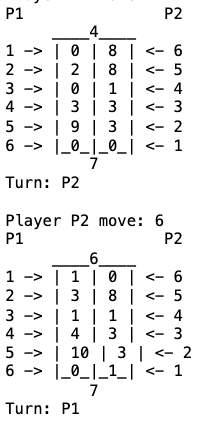

Now let's make sure our minimax_search algorithm is working by setting the ply level to 0 and calculating by hand if it makes the move that will maximize its mancala points. You can set the ply level to 0 by adjusting the cutoff parameter in the h_minimax_search function above: `h_minimax_search(game, state, cutoff=cutoff_depth(0))`.

In [18]:
# minimax vs minimax at 0 ply depth
manc_game = Mancala_Game()
play_game(manc_game, {'P1':h_minimax_search, 'P2':h_minimax_search}, verbose=True)

Player P1 move: 3
P1               P2
     ____0____     
1 -> | 4 | 4 | <- 6
2 -> | 4 | 4 | <- 5
3 -> | 0 | 4 | <- 4
4 -> | 5 | 4 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_5_|_4_| <- 1
         1         
Turn: P2

Player P2 move: 3
P1               P2
     ____1____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 5 | <- 4
4 -> | 5 | 0 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_5_|_4_| <- 1
         1         
Turn: P1

Player P1 move: 4
P1               P2
     ____1____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 5 | <- 4
4 -> | 0 | 0 | <- 3
5 -> | 6 | 5 | <- 2
6 -> |_6_|_5_| <- 1
         2         
Turn: P2

Player P2 move: 2
P1               P2
     ____2____     
1 -> | 4 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 0 | 1 | <- 3
5 -> | 6 | 0 | <- 2
6 -> |_6_|_5_| <- 1
         2         
Turn: P1

Player P1 move: 5
P1               P2
     ____2____     
1 -> | 4 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 7 | <- 4
4 -> | 0 | 2 | <- 3
5 -> | 0 | 1 | <- 2
6 -> |_7_|

('P2', 26)

We can observe in the output above how each turn, the minimax players are making the moves that will maximize their mancala immediate gain in mancala points. The first option the AI sees that will score them the maximum possible amount of immediate points they will choose. We can observe this behavior in P2 in the screenshot below:
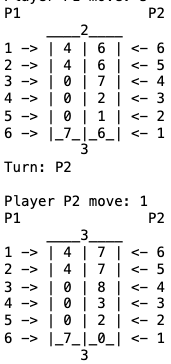